In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
print('tensorflow version = %s'%(tf.__version__))
print('Ready...')

C:\Users\JeongYeong\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensorflow version = 1.9.0
Ready...


# infinite wall problem

In [2]:
# define potential function, inf == 1000.0
# axis x = [0, 1]
bins = 20; dx = 1 / (bins - 1);
inf = 1000

pot = np.zeros(bins)
pot[0] = inf; pot[-1] = inf
pot = tf.constant(pot, shape=pot.shape, dtype=tf.float32, name='infinite_potential_wall')

In [3]:
# placeholder for training
train = tf.placeholder(tf.float32, [1, bins], name='training_psi')

In [4]:
# define weight and bias
weight1 = tf.Variable(tf.random_normal([bins, bins]), name='weight1')
bias1 = tf.Variable(tf.random_normal([1, bins]), name='bias1')

In [ ]:
t

In [15]:
psi = tf.add(tf.matmul(train, weight1), bias1, name='psi')

#h_bar = 6.63 * 10**(-34)
#m = 9.11 * 10**(-31)
#C = -h_bar**2 / (2*m)
C = -1
A = C / dx**2
A = tf.constant(A, shape=[1, bins])

def get_energy(psi, pot, A):
    psi1 = tf.concat([tf.slice(psi, [0, 1], [1, bins-1]), [[0.]]], 1)
    psi2 = tf.concat([[[0.]], tf.slice(psi, [0, 0], [1, bins-1])], 1)
    # psi * En = - 2*A*psi + Vn*psi + A * (psi(n-1) + psi(n+1))
    p1 = tf.multiply(2*A, psi)
    p2 = tf.multiply(pot, psi)
    p3 = tf.multiply(A, tf.add(psi1, psi2))
    return tf.subtract(tf.add(p2, p3), p1)


energy = get_energy(psi, pot, A)
variance = tf.square(energy - psi) / bins

cost = tf.reduce_mean(energy)


In [20]:
opt = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [21]:
#sum_energy = tf.summary.scalar('energy', energy)
sum_variance = tf.summary.histogram('variance', variance)
sum_energy = tf.summary.histogram('energy', energy)
sum_cost = tf.summary.scalar('cost', cost)
#sum_psi = tf.summary.scalar('prob', tf.reduce_sum(tf.square(psi)))
sum_weight = tf.summary.histogram('weight', weight1)
sum_bias = tf.summary.histogram('bias', bias1)

In [22]:
directory = './schrodinger_eq_1d'
with tf.Session() as sess:
    writer = tf.summary.FileWriter(directory)
    writer.add_graph(sess.graph)

    merged = tf.summary.merge_all()
    
    sess.run(tf.global_variables_initializer())
    
    itr = 100000
    
    init = np.ones([1, bins], dtype=np.float32)
    
    for step in tqdm_notebook(range(itr)):
        #randinput = np.random.uniform(-100, 100, size=[1, bins])
        cost_val, summary, _ = sess.run([cost, merged, opt], feed_dict={train: init}) # randinput
        
        writer.add_summary(summary, global_step=step)
        
        #writer.add_summary(sum1, global_step=step)
        #writer.add_summary(sum2, global_step=step)
        #writer.add_summary(sum_weight, global_step=step)
        #writer.add_summary(sum_bias, global_step=step)
        
    psi_val1 = sess.run(psi, feed_dict={train: init})
    w_val1 = sess.run(weight1)
    b_val1 = sess.run(bias1)
    potential = sess.run(pot)

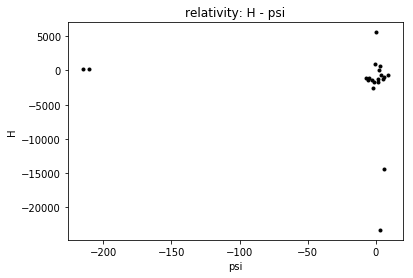

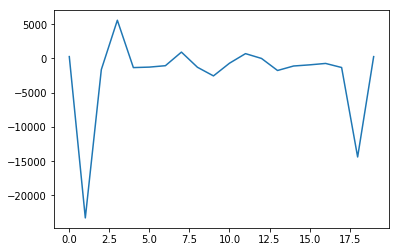

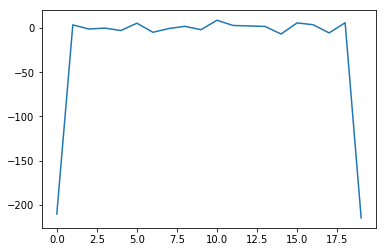

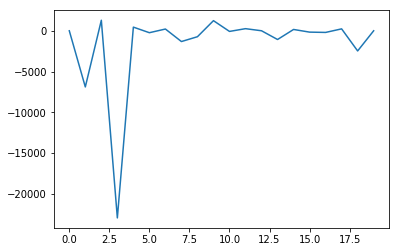

In [19]:
val_A = C / dx**2
def calculate_H(psi, pot, A):
    psi1 = np.concatenate([psi[0,1:], [0.]], 0)
    psi2 = np.concatenate([[0.], psi[0,:-1]], 0)
    psi3 = A * (psi1 + psi2) / psi
    return 2*A + pot - psi3

def plot_rel(psi, H):
    plt.scatter(psi, H, marker='.', c='k')
    plt.title('relativity: H - psi')
    plt.xlabel('psi')
    plt.ylabel('H')
    plt.show()
    
H_val = calculate_H(psi_val1, potential, val_A)

ee = H_val / psi_val1

plot_rel(psi_val1[0], H_val[0])
plt.plot(H_val[0]); plt.show()
plt.plot(psi_val1[0]); plt.show()
plt.plot(ee[0]); plt.show()

In [30]:
psi1 = np.concatenate([psi_val1[0,1:], [0.]], 0)
psi2 = np.concatenate([[0.], psi_val1[0,:-1]], 0)
psi3 = val_A * (psi1 + psi2) / psi_val1


[[ 551.77992047  584.65608291  -16.84935831 -707.67269038 -700.13619635
  -704.67299465 -716.77872297 -705.82061652 -791.86514295 -722.69152433
  -743.06031828 -657.27988322  268.23752689  -58.05123564 -838.17710691
  -727.06965011 -726.95650466 -726.62007599 8369.06985499   14.84967353]]


In [19]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA seque

In [110]:


def hhh(w, b):
    x = np.ones([1, bins])
    psi = np.dot(x, w_val1) + b
    psi = psi.reshape(bins)
    pot = np.ones(bins)
    pot[0] = inf; pot[-1] = inf
    dy2dx2 = 2 * psi - (np.concatenate(([0.], psi[1:]), axis=0) + np.concatenate((psi[:-1], [0]), axis=0))
    temp1 = np.multiply(1, dy2dx2 * dx**2) + np.multiply(pot, psi)
    temp2 = np.sum(temp1 / psi)
    return temp1, temp2 # H, E
    


In [116]:
tp1, tp2 = hhh(w_val1, b_val1)
#print(tp1)
var1 = np.sum(np.square(tp1 - tp2 * psi))/bins
print(var1)
# need to see cost

502434865.98696154


In [30]:
plt.figure(figsize=(20, 10))

x = np.arange(bins)
plt.plot(x, potential)
y = np.ones([1, bins])
psi = np.dot(y, w_val1) + b_val1
psi = psi.reshape(x.shape)
psi = psi / np.sqrt(np.square(psi) * dx)

plt.plot(x, psi)
plt.ylim(-100, 100)
x = np.ones([1, bins])
    psi = np.dot(y, w_val1) + bplt.show()

IndentationError: unexpected indent (<ipython-input-30-7fba913c85e3>, line 13)

In [74]:
x = np.ones([1, bins])
psi = np.dot(y, w_val1) + b_val1
print(psi.shape)

temp = np.concatenate(([0.], psi[1:]), axis=0) + np.concatenate((psi[:-1], [0]), axis=0)
print(temp.shape)
print(psi.shape)

(1, 100)


ValueError: all the input arrays must have same number of dimensions

In [51]:
help(np.concatenate)

Help on built-in function concatenate in module numpy.core.multiarray:

concatenate(...)
    concatenate((a1, a2, ...), axis=0, out=None)
    
    Join a sequence of arrays along an existing axis.
    
    Parameters
    ----------
    a1, a2, ... : sequence of array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        The axis along which the arrays will be joined.  Default is 0.
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what concatenate would have returned if no
        out argument were specified.
    
    Returns
    -------
    res : ndarray
        The concatenated array.
    
    See Also
    --------
    ma.concatenate : Concatenate function that preserves input masks.
    array_split : Split an array into multiple sub-arrays of equal or
                  near-equal size.
  